In [ ]:
"""
MatSoc: Intro to ML Techniques
Assignment 1
Deadline: Wednesday, 27 December 2023, 23:59 IST

Name: Anshuman Singh
Roll Number: 220176
IITK Email: anshumans22@iitk.ac.in

Part A:

I.

1. Plot x vs y scatter plot for the given dataset
2. Plot the histogram of the y values
3. Clean the data by removing outliers and nan value containing datapoints
4. Plot a histogram for y values before and after cleaning the data.
5. Split the data into train and test with 85% of the data used for training

II.

1. Implement the following function:

  def gradient_descent(x,y,alpha=learning_rate,epochs=number of iteratrions)

  The function should return two parameter values (a,b)
  corresponding to the model  ŷ=a*x+b

2. Plot the histogram with the residuals (y- ŷ) after model training for the
   original and predicted values

3. Plot the  ŷ vs x (line chart), preferrably on top of a y vs x scatter plot

  Note that the code for all of part A must be visible

  Preferrably use pandas for data cleaning and matplotlib for plotting

  Make sure all the code is run before you submit the notebook

Part B:

    1. Report the parameter values after training on the given data
       the target variable is 'y' and there is only one feature 'x'
    2. Report the MSE value for your model after training
    3. What do you think is the ideal ratio for train data if we are splitting
       the data into train and test datasets? Is the answer same irrespective of
       the size of the dataset? What percent would you take for training
       if your dataset has 1 feature, 1 target and 250 data points, what would
       you do if it had 10,000 data points instead of 250 data points

      Note that there is no single correct answer for part B

"""

Saving data.csv to data (5).csv


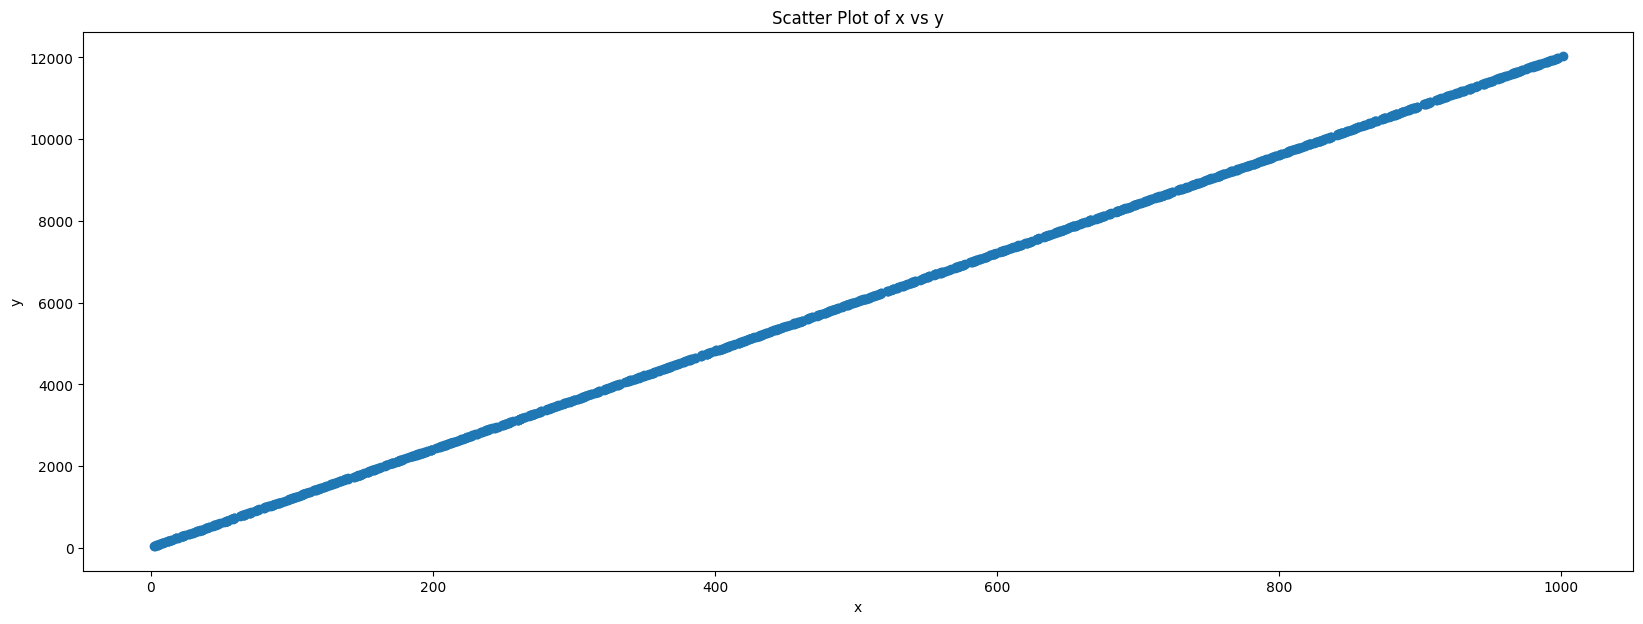

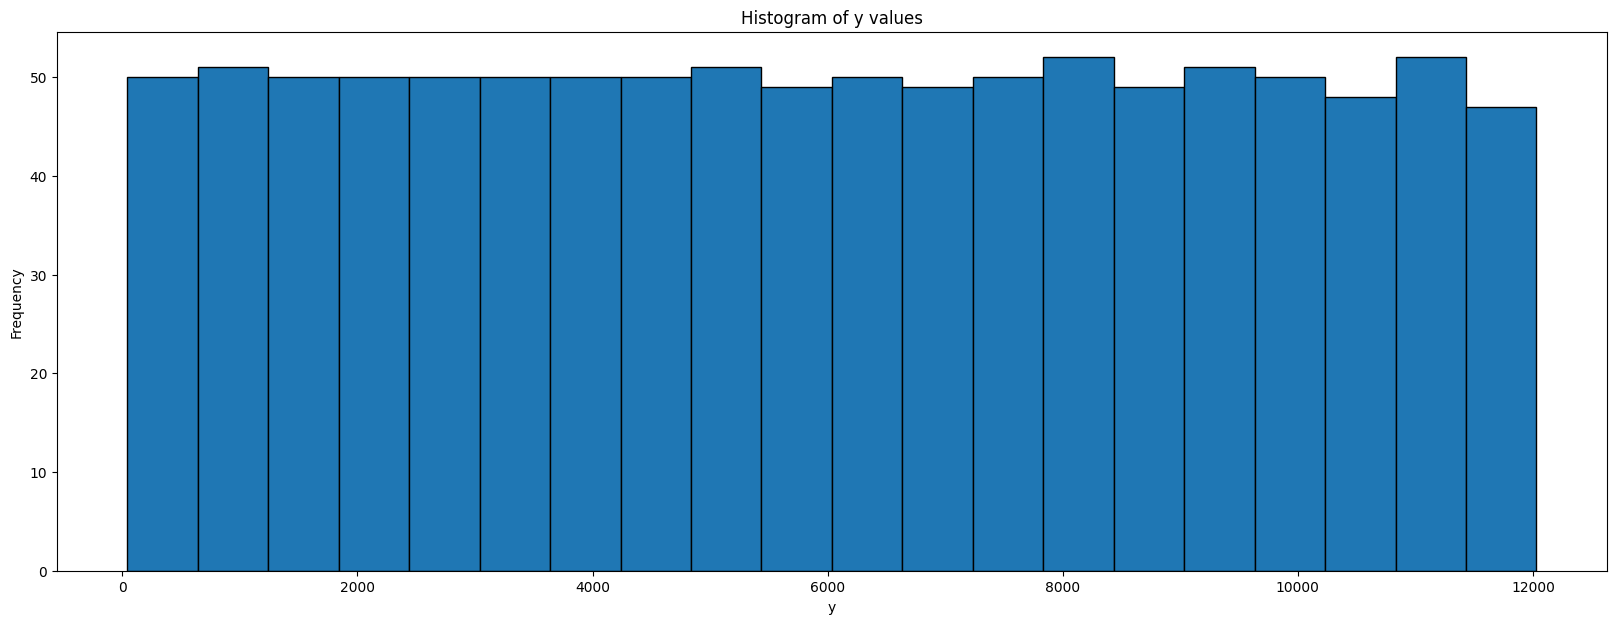

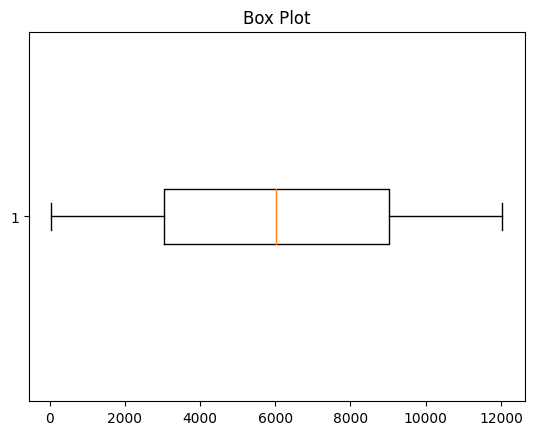

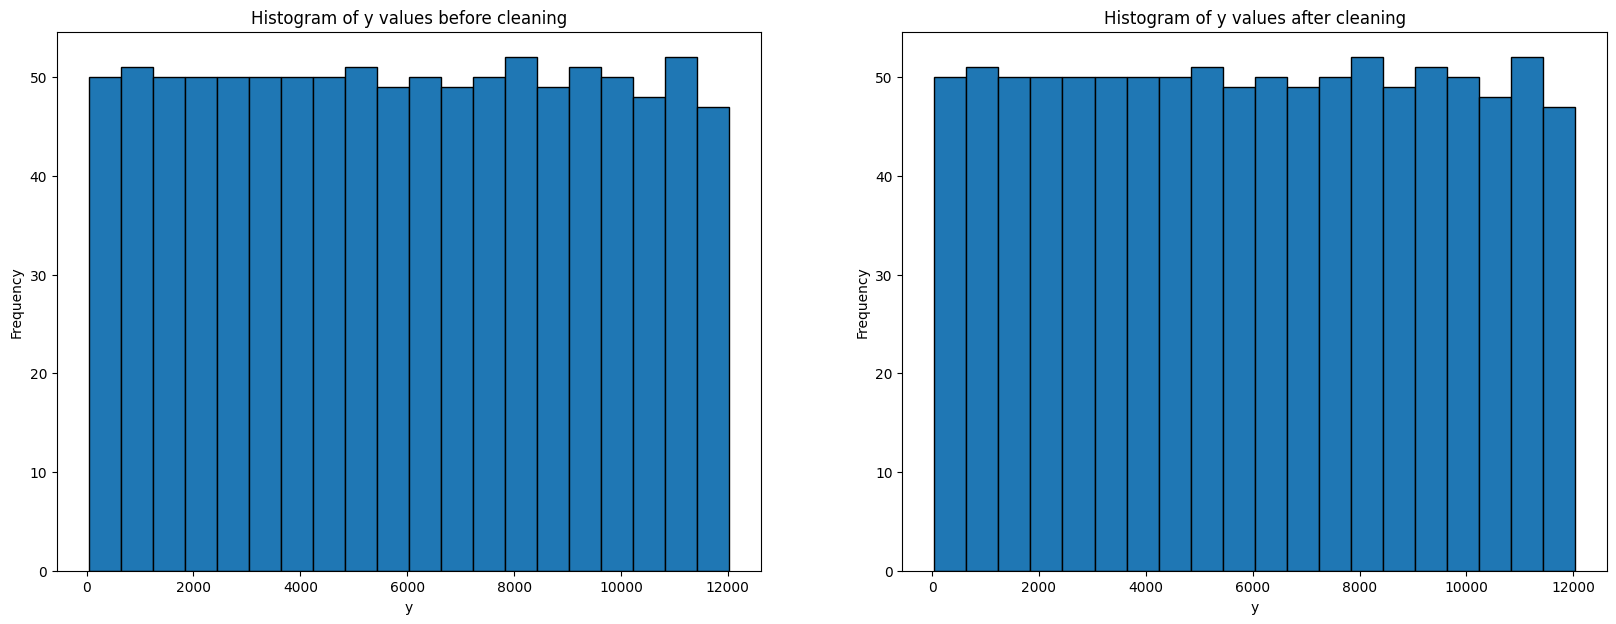

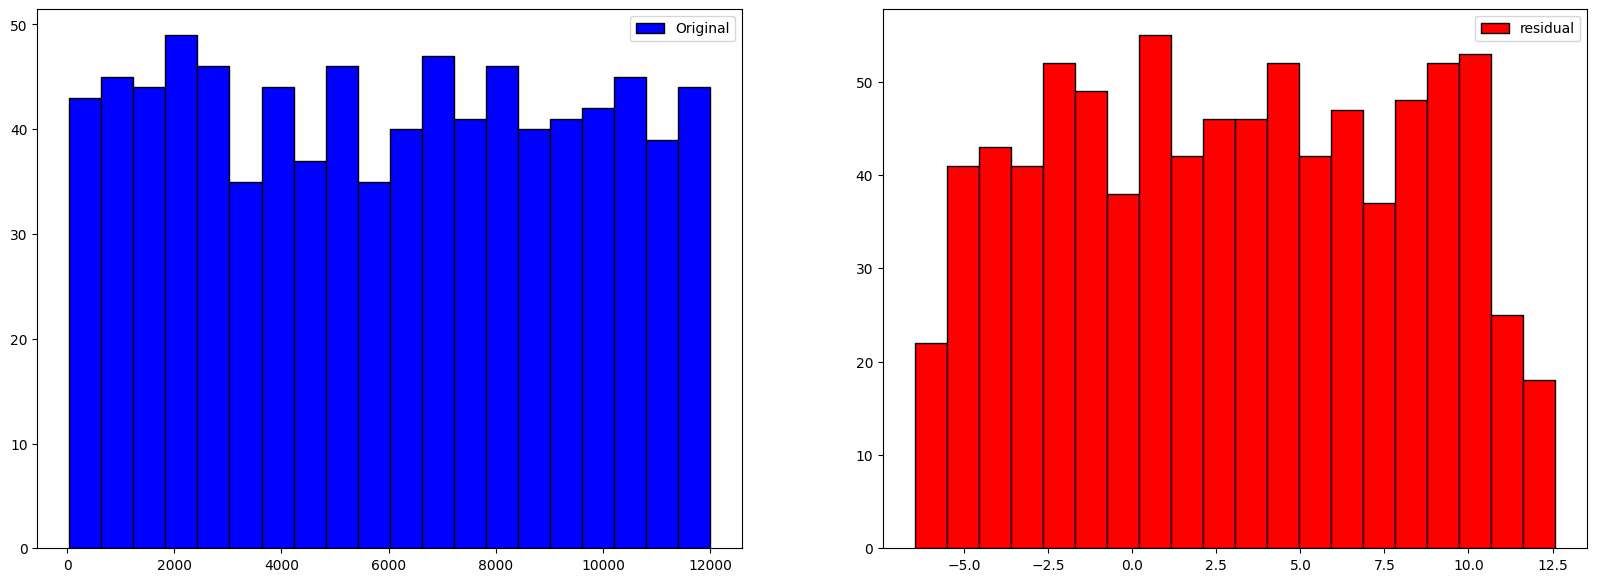

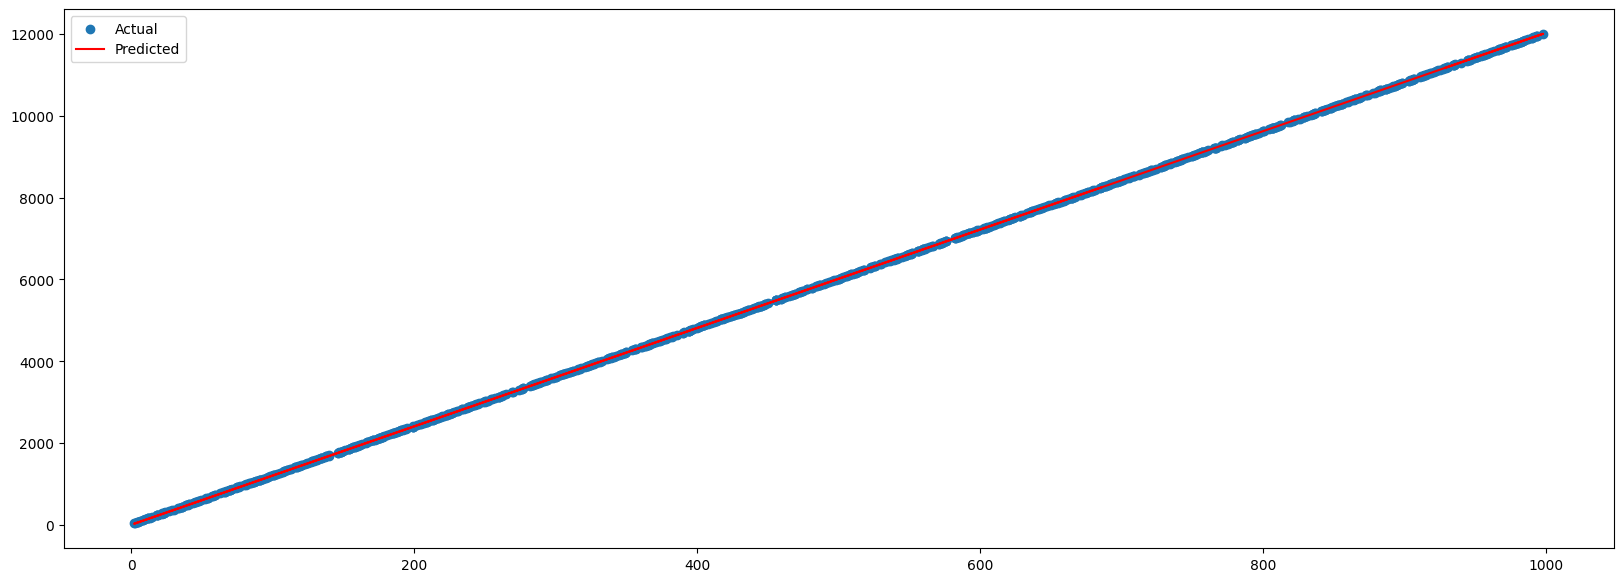

Parameter values are: a=12.017377252763364, b=7.427736589125261
Mean Squared Error (MSE): 34.73565709787187


In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab import files

uploaded = files.upload()
df = pd.read_csv('data.csv')

#Plot x vs y scatter plot for the given dataset
plt.figure(figsize=(20,7))
plt.scatter(df['x'],df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of x vs y')
plt.show()

#Plot the histogram of the y values
plt.figure(figsize=(20,7))
plt.hist(df['y'], bins=20, edgecolor='black')
plt.xlabel('y')
plt.ylabel('Frequency')
plt.title('Histogram of y values')
plt.show()

#Clean the data by removing outliers and nan value containing datapoints
plt.boxplot(df['y'], vert=False)
plt.title('Box Plot')
plt.show()

mean = df['y'].mean()
std = df['y'].std()
l = mean - std*2
u = mean + std*2
df_cleaned = df[(df['y'] >= l) & (df['y'] <= u)]

df_cleaned = df_cleaned.dropna(axis=0)

# Plot a histogram for y values before and after cleaning the data.
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.hist(df['y'], bins=20, edgecolor='black')
plt.xlabel('y')
plt.ylabel('Frequency')
plt.title('Histogram of y values before cleaning')

plt.subplot(1,2,2)
plt.hist(df_cleaned['y'], bins=20, edgecolor='black')
plt.xlabel('y')
plt.ylabel('Frequency')
plt.title('Histogram of y values after cleaning')
plt.show()

# Split the data into train and test with 85% of the data used for training
X = df['x']
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

# Implement the following function:
# def gradient_descent(x,y,alpha=learning_rate,epochs=number of iteratrions)
# The function should return two parameter values (a,b) corresponding to the model  ŷ=a*x+b
def gradient_descent(x, y, alpha, epochs):
   m = len(y)
   a=0
   b=0
   for _ in range(epochs):
        for i in range(m):
            y_pred = a * x[i] + b
            gradient_a = (2/m) * np.sum(x[i] * (y_pred - y[i]))
            gradient_b = (2/m) * np.sum((y_pred - y[i]))
            a = a - alpha * gradient_a
            b = b - alpha * gradient_b

   return a, b

learning_rate = 0.001
iterations = 1000
a, b = gradient_descent(X_train.values, y_train.values, alpha=learning_rate, epochs=iterations)

predicted_y = a*X_train + b
res = y_train - predicted_y

# Plot the histogram with the residuals (y- ŷ) after model training for the original and predicted values
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.hist(y_train, bins=20, edgecolor='black', color='blue', label='Original')
plt.legend()

plt.subplot(1,2,2)
plt.hist(res, bins=20, edgecolor='black', color='red', label='residual')
plt.legend()
plt.show()

# Plot the  ŷ vs x (line chart), preferrably on top of a y vs x scatter plot
plt.figure(figsize=(20,7))
plt.scatter(X_train, y_train, label='Actual')
plt.plot(X_train, predicted_y, color='red', label='Predicted')
plt.legend()
plt.show()

# Report the parameter values after training on the given data the target variable is 'y' and there is only one feature 'x'
print(f'Parameter values are: a={a}, b={b}')

# Report the MSE value for your model after training
mse = np.mean((predicted_y - y_train)**2)
print(f'Mean Squared Error (MSE): {mse}')


# What do you think is the ideal ratio for train data if we are splitting the data into train and test datasets? Is the answer same irrespective of the size of the dataset?
# What percent would you take for training if your dataset has 1 feature, 1 target and 250 data points, what would you do if it had 10,000 data points instead of 250 data points

      #  Ans:- Ideally, 80-20 would be good option for train data.
      #        No, the ratio would vary with size of datasets. If we have datasets in range of 100-1000 then 80-20 percentage would be a good choice but if we have datasets in
      #        range of 10,000 then 90-10 percentage would be better.
      #        For, 250 data points 80-20 precentage would be a good option. For, 10,000 data points 90-10 precentage would be a good option.

